In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../routing/data/df_save.csv')
print(list(df.columns))
print('shape = ',df.shape)
df = df.dropna()

df['interv_dist_shortest_path'] = df['interv_dist_shortest_path'] / 10
df['interv_dist_best_interv_dist'] = df['interv_dist_best_interv_dist'] / 10
df['interv_dist_best_co2'] = df['interv_dist_best_co2'] / 10

df['length_km_shortest_path'] = df['length_km_shortest_path'] * 1000
df['length_km_best_interv_dist'] = df['length_km_best_interv_dist'] * 1000
df['length_km_best_co2'] = df['length_km_best_co2'] * 1000

df.head(2)

['od', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'length_km_shortest_path', 'interv_dist_shortest_path', 'co2_shortest_path', 'length_km_best_interv_dist', 'interv_dist_best_interv_dist', 'co2_best_interv_dist', 'best_interv_dist_is_shortest', 'length_km_best_co2', 'interv_dist_best_co2', 'co2_best_co2', 'best_co2_is_shortest']
shape =  (195, 16)


,od,start_latitude,start_longitude,end_latitude,end_longitude,length_km_shortest_path,interv_dist_shortest_path,co2_shortest_path,length_km_best_interv_dist,interv_dist_best_interv_dist,co2_best_interv_dist,best_interv_dist_is_shortest,length_km_best_co2,interv_dist_best_co2,co2_best_co2,best_co2_is_shortest
0,"(9006869435, 13870880)",53.571057,9.980875,53.554810,10.006350,3057.054,23.78660,0.553705,3057.054,23.78660,0.553705,True,3057.054,23.78660,0.553705,True
1,"(2516080625, 32206485)",53.540747,10.003942,53.557623,9.983797,2871.634,28.49827,0.602063,2878.473,25.11387,0.571447,False,2878.473,25.11387,0.571447,False


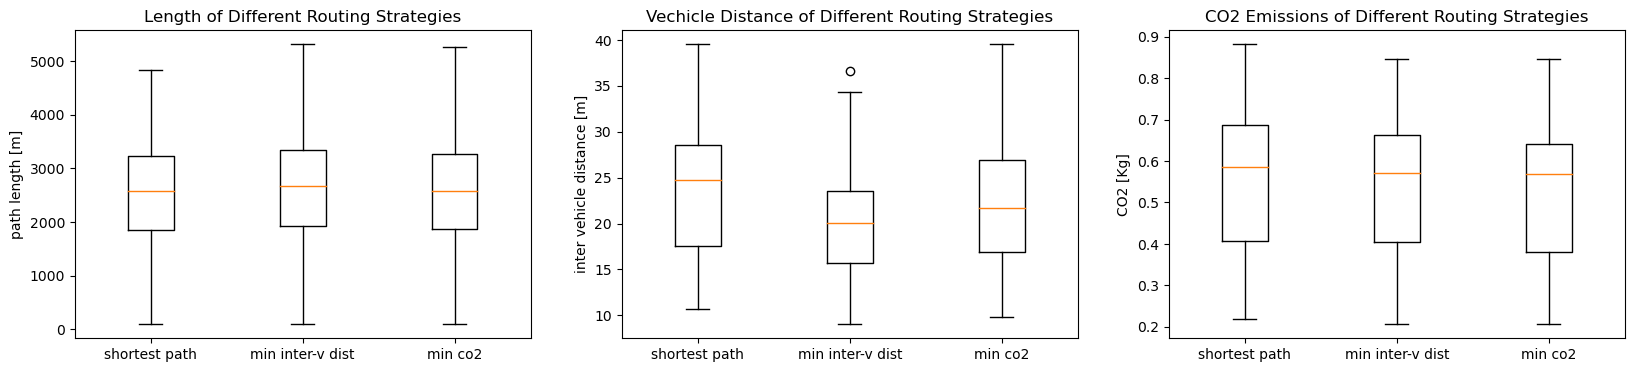

In [3]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 3, 1)
plt.boxplot(df[['length_km_shortest_path','length_km_best_interv_dist','length_km_best_co2']])
plt.xticks([1,2,3], ['shortest path','min inter-v dist','min co2'])
plt.ylabel('path length [m]')
plt.title('Length of Different Routing Strategies')

plt.subplot(1, 3, 2)
plt.boxplot(df.loc[df['interv_dist_best_interv_dist'] < df['interv_dist_shortest_path'],['interv_dist_shortest_path','interv_dist_best_interv_dist','interv_dist_best_co2']])
plt.xticks([1,2,3], ['shortest path','min inter-v dist','min co2'])
plt.ylabel('inter vehicle distance [m]')
plt.title('Vechicle Distance of Different Routing Strategies')

xdf = df
#xdf['co2_best_co2'] = xdf['co2_best_co2'] - 0.005
plt.subplot(1, 3, 3)
plt.boxplot(df.loc[xdf['co2_best_co2'] < xdf['co2_shortest_path'],['co2_shortest_path','co2_best_interv_dist','co2_best_co2']])
plt.xticks([1,2,3], ['shortest path','min inter-v dist','min co2'])
plt.ylabel('CO2 [Kg]')
plt.title('CO2 Emissions of Different Routing Strategies')
plt.savefig('images/routing1.pdf',bbox_inches='tight')  
plt.show()

In [4]:
df['co2_saving'] = df['co2_shortest_path'] - df['co2_best_co2']
# trick for now
#df['co2_saving'] = np.where(df['co2_saving'] < 0, 0, df['co2_saving'])
df['co2_saving_pc'] = df['co2_saving'] / df['co2_shortest_path']
print('% CO2 Saving = ',df.loc[df['co2_saving_pc']>0,'co2_saving_pc'].mean()*100)

% CO2 Saving =  4.9056844734927


In [5]:
df['ivd_saving'] = df['interv_dist_shortest_path'] - df['interv_dist_best_interv_dist']
# trick for now
#df['co2_saving'] = np.where(df['co2_saving'] < 0, 0, df['co2_saving'])
df['ivd_saving_pc'] = df['ivd_saving'] / df['interv_dist_shortest_path']
print('% Inter-vehicle Saving = ',df.loc[df['ivd_saving_pc']>0,'ivd_saving_pc'].mean()*100)

% Inter-vehicle Saving =  15.423002574254463


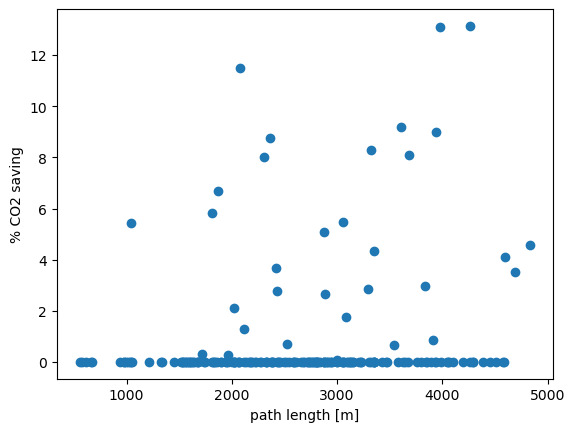

In [6]:
xdf = df[df['length_km_shortest_path']>500]
plt.scatter(xdf['length_km_shortest_path'],xdf['co2_saving_pc']*100)
plt.ylabel('% CO2 saving')
plt.xlabel('path length [m]')
plt.savefig('images/routing2.pdf',bbox_inches='tight') 
plt.show()